# Machine Learning Model For Liar Clasificaiton

- Our App able to flasification a illegal parking area, in this model.

## library preparation

In [25]:
import pandas as pd
import joblib as joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
BASEDATA = "Dataset/DataFIxParkirLiarv1.csv"
FILENAME = "Parkir_liar_Model.pkl"
FILENAMEGRID = "Parkir_liar_Model_TUNED.pkl"

In [4]:
# import pandas as pd
# import numpy as np

# # Membaca file CSV
# data = pd.read_csv(BASEDATA)

# # Mengacak data
# shuffled_data = data.sample(frac=1).reset_index(drop=True)

# # Menyimpan hasil ke file CSV baru
# shuffled_data.to_csv('Shuffled_DataFIxParkirLiar.csv', index=False)

# # Menampilkan 50 data teratas dari data yang diacak
# print(shuffled_data.head(50))

In [27]:
# Load Dataset 
parkirDf = pd.read_csv(BASEDATA)

In [59]:
parkirDf.value_counts

<bound method DataFrame.value_counts of                          Deskripsi    Kategori Jenis Kendaraan  Waktu
0                Parkir di trotoar        Liar           Motor  00:00
1                Parkir di trotoar        Liar           Motor  00:01
2                Parkir di trotoar        Liar           Motor  00:02
3                Parkir di trotoar        Liar           Motor  00:03
4                Parkir di trotoar        Liar           Motor  00:04
...                            ...         ...             ...    ...
25915  Parkir di Lahan Parkir Umum  Tidak Liar           Mobil  23:55
25916  Parkir di Lahan Parkir Umum  Tidak Liar           Mobil  23:56
25917  Parkir di Lahan Parkir Umum  Tidak Liar           Mobil  23:57
25918  Parkir di Lahan Parkir Umum  Tidak Liar           Mobil  23:58
25919  Parkir di Lahan Parkir Umum  Tidak Liar           Mobil  23:59

[25920 rows x 4 columns]>

In [28]:
parkirDf.head()

,Deskripsi,Kategori,Jenis Kendaraan,Waktu
0,Parkir di trotoar,Liar,Motor,00:00
1,Parkir di trotoar,Liar,Motor,00:01
2,Parkir di trotoar,Liar,Motor,00:02
3,Parkir di trotoar,Liar,Motor,00:03
4,Parkir di trotoar,Liar,Motor,00:04


In [29]:
print("Data yang NAN : ")
parkirDf.isna().sum()

Data yang NAN : 


Deskripsi          0
Kategori           0
Jenis Kendaraan    0
Waktu              0
dtype: int64

## Handling Missing Value

In [30]:
parkirDf.dropna(inplace = True)

In [31]:
parkirDf.head()

,Deskripsi,Kategori,Jenis Kendaraan,Waktu
0,Parkir di trotoar,Liar,Motor,00:00
1,Parkir di trotoar,Liar,Motor,00:01
2,Parkir di trotoar,Liar,Motor,00:02
3,Parkir di trotoar,Liar,Motor,00:03
4,Parkir di trotoar,Liar,Motor,00:04


In [32]:
# Pisahkan fitur dan target
X = parkirDf.drop('Kategori', axis=1)  # Fitur
y = parkirDf['Kategori']               # Target


In [33]:
print(X)



                         Deskripsi Jenis Kendaraan  Waktu
0                Parkir di trotoar           Motor  00:00
1                Parkir di trotoar           Motor  00:01
2                Parkir di trotoar           Motor  00:02
3                Parkir di trotoar           Motor  00:03
4                Parkir di trotoar           Motor  00:04
...                            ...             ...    ...
25915  Parkir di Lahan Parkir Umum           Mobil  23:55
25916  Parkir di Lahan Parkir Umum           Mobil  23:56
25917  Parkir di Lahan Parkir Umum           Mobil  23:57
25918  Parkir di Lahan Parkir Umum           Mobil  23:58
25919  Parkir di Lahan Parkir Umum           Mobil  23:59

[25920 rows x 3 columns]


In [34]:
print(y)

0              Liar
1              Liar
2              Liar
3              Liar
4              Liar
            ...    
25915    Tidak Liar
25916    Tidak Liar
25917    Tidak Liar
25918    Tidak Liar
25919    Tidak Liar
Name: Kategori, Length: 25920, dtype: object


In [35]:
print(parkirDf.columns)

Index(['Deskripsi', 'Kategori', 'Jenis Kendaraan', 'Waktu'], dtype='object')


In [36]:
print(repr(parkirDf.columns))
parkirDf.columns = parkirDf.columns.str.strip()



Index(['Deskripsi', 'Kategori', 'Jenis Kendaraan', 'Waktu'], dtype='object')


In [37]:
print(type(parkirDf))


<class 'pandas.core.frame.DataFrame'>


In [38]:

# Pembagian data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
print((X_train.shape, X_test.shape), (y_train.shape, y_test.shape))

((20736, 3), (5184, 3)) ((20736,), (5184,))


## Preprocesing

In [40]:
    
# Preprocessing
categorical_cols = [ 'Deskripsi', 
                    'Jenis Kendaraan' ]  # Kolom kategori

In [41]:
# Preprocessing pipeline (OneHot untuk kategori, tetap untuk numerik)
preprocessor = ColumnTransformer(
    transformers=[
        ('Encode', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

## Building Model

In [42]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [ ]:
# Hyperparameter tuning for KNN

param_grid = {'classifier__n_neighbors': [3, 5, 7, 9, 11],
                'classifier__weights': ['uniform', 'distance'],
                'classifier__p': [1, 2]}


In [44]:
# Define Knn Model 

def gridsearchKnn(X_train, y_train,knn_pipeline,param_grid):
    grid_search_knn = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search_knn.fit(X_train, y_train)
    return grid_search_knn

def knn(X_train, y_train):
    return knn_pipeline.fit(X_train, y_train)


In [45]:
def save_model(model, filename):
    # Save the trained model using joblib
    joblib.dump(model, filename)
    print(f"Model saved to {filename}")

In [46]:
def Load_Model(filename):
    # Load the trained model
    model_loaded = joblib.load(filename)
    print(f"Model loaded from {filename}")
    return model_loaded

In [47]:
# Run the pipeline (Knn Original)
Knn_model = knn(X_train, y_train)
save_model(Knn_model,FILENAME)

Model saved to Parkir_liar_Model.pkl


In [48]:
# Run the pipeline (Knn Original)
gridsearchKnn_Model = gridsearchKnn(X_train, y_train,knn_pipeline,param_grid)
save_model(gridsearchKnn_Model,FILENAMEGRID )

c:\Users\boiwi\miniconda3\envs\TF\lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\boiwi\miniconda3\envs\TF\lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\boiwi\miniconda3\envs\TF\lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\boiwi\miniconda3\envs\TF\lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "c:\Users\boiwi\miniconda3\envs\TF\lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\boiwi\miniconda3\envs\TF\lib\site-packages\sklearn\utils\_respon

Model saved to Parkir_liar_Model_TUNED.pkl


c:\Users\boiwi\miniconda3\envs\TF\lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan  1.  1.  1. nan  1.  1.  1. nan  1.  1.  1. nan  1.  1.  1. nan  1.
  1.  1.]
  warnings.warn(


In [49]:
Load_Model("Parkir_liar_Model_TUNED.pkl")

Model loaded from Parkir_liar_Model_TUNED.pkl


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('Encode',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Deskripsi',
                                                                          'Jenis '
                                                                          'Kendaraan'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [3, 5, 7, 9, 11],
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [60]:
Load_Model("Parkir_liar_model.pkl")

Model loaded from Parkir_liar_model.pkl


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Deskripsi',
                                                   'Jenis Kendaraan'])])),
                ('classifier', KNeighborsClassifier())])

## Prediction

In [50]:
def Predict( model_loaded):
    # # Collect new data for prediction
    # Hari = input("Masukkan Hari: ")
    # Lokasi = input("Masukkan Lokasi: ")
    # Jenis_Kendaraaan = input("Masukkan Jenis Kendaraan: ")
    # Deskripsi_Masalah = input("Masukkan Deskripsi Masalah: ")
    # Jam = int(input("Masukkan Jam Pelanggaran: "))

    # Prepare new data for prediction
    New_data = pd.DataFrame({
        'Jenis Kendaraan': 'Motor',
        'Deskripsi Masalah': 'Parkir di trotoar',
    })

    # Access the pipeline from best_estimator_
    best_pipeline = model_loaded.best_estimator_

    # Ensure the new data undergoes the same preprocessing steps
    New_data_transformed = best_pipeline['preprocessor'].transform(New_data)

    # Make predictions using the loaded model
    predictions = best_pipeline['classifier'].predict(New_data_transformed)

    # Display the predictions
    New_data['Prediksi Status Pelaporan'] = predictions
    print(New_data[['Hari', 'Lokasi', 'Jenis Kendaraan', 'Deskripsi Masalah', 'Jam', 'Prediksi Status Pelaporan']])


In [51]:
## save_model(knn, FILENAME)
# Membuat DataFrame dengan format yang sesuai
new_data = pd.DataFrame({
    'Deskripsi': ['Parkir di trotoar', 'Parkir di Area Parkir Resmi'],  # Contoh deskripsi parkir liar
    'Jenis Kendaraan': ['Mobil', 'Motor'],  # Jenis kendaraan
    'Waktu': ['24:30', '12:00']  # Format waktu
})

# Prediksi
y_pred = Knn_model.predict(new_data)

# Hasil prediksi
new_data['Prediksi Status Pelaporan'] = y_pred

In [52]:
# Print hasil prediksi
print(new_data[[ 'Deskripsi', 'Jenis Kendaraan','Waktu', 'Prediksi Status Pelaporan']])

                     Deskripsi Jenis Kendaraan  Waktu  \
0            Parkir di trotoar           Mobil  24:30   
1  Parkir di Area Parkir Resmi           Motor  12:00   

  Prediksi Status Pelaporan  
0                      Liar  
1                Tidak Liar  


In [53]:
y_pred = Knn_model.predict(X_test)

In [54]:
print(f"X_test shape: {X_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

X_test shape: (5184, 3)
y_pred shape: (5184,)


## Visualization

In [55]:
class visualization:
    def Confusion_matrix(y_test, y_pred, knn):
        # Compute and display confusion matrix
        cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=knn.classes_)
        disp.plot()
        plt.title("Confusion Matrix Parkir")
        plt.show()
        
    def Classification_report(y_test, y_pred):
        report = classification_report(y_test, y_pred, target_names=['Tidak Liar Pelanggaran', 'Liar'])
        print("\nClassification Report Parkir:\n", report)

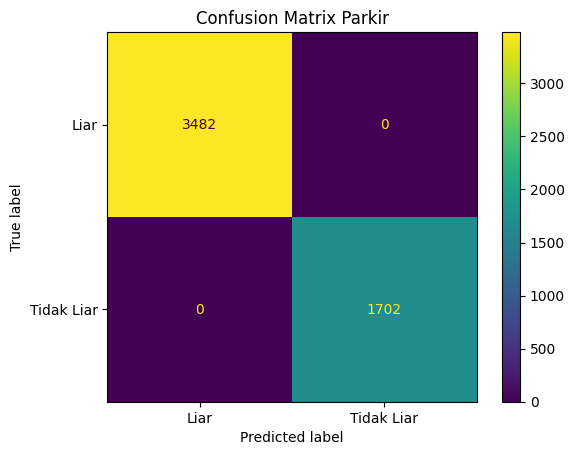

In [56]:
visualization.Confusion_matrix(y_test, y_pred, Knn_model)

In [58]:
visualization.Classification_report(y_test, y_pred)


Classification Report Parkir:
                         precision    recall  f1-score   support

Tidak Liar Pelanggaran       1.00      1.00      1.00      3482
                  Liar       1.00      1.00      1.00      1702

              accuracy                           1.00      5184
             macro avg       1.00      1.00      1.00      5184
          weighted avg       1.00      1.00      1.00      5184

